# PyTorch Crash Course

## 5 Chapters
1. Introduction to Tensors  
  - Tensor Operations: Create, Numpy, GPU Support
2. Autograd: Automatic Differentiation of PyTorch  
  - Linear Regression Example
3. Training Loop with: Model, Loss, Optimizer  
  - A Typical PyTorch Workflow / training pipeline
4. Neural Network  
  - Also: GPU/Mps, DataLoader, Transforms & Evaluation
5. Convolutional Neural Network (CNN)  
  - Also: Save & Load Model

# 1. Introduction to Tensors

Everything in Pytorch is a tensor. Tensor is the basic datastructure in PyTorch that extends numpy. 

In theory, tensor is a multi-dimensional matrix containing elements of the same data type.

In [16]:
import torch

x = torch.empty(5)
print(f'empty(5): {x} with shape {x.shape}')
x = torch.empty(2,3)
print(f'empty(2,3): {x} with shape: {x.shape}')
x = torch.ones(1)
print(f'ones(1): {x} with shape: {x.shape}')
x = torch.ones(1,2)
print(f'ones(1,2): {x} with shape: {x.shape}')
x = torch.zeros(2)
print(f'zeros(2): {x} with shape: {x.shape}')
x = torch.zeros(2,2)
print(f'zeros(2, 2): {x} with shape: {x.shape}')
x = torch.rand(5)
print(f'rand(5): {x} with shape: {x.shape}')
x = torch.rand(5,5)
print(f'rand(5,5): {x} with shape: {x.shape}')

empty(5): tensor([0., 0., 0., 0., 0.]) with shape torch.Size([5])
empty(2,3): tensor([[0., 0., 0.],
        [0., 0., 0.]]) with shape: torch.Size([2, 3])
ones(1): tensor([1.]) with shape: torch.Size([1])
ones(1,2): tensor([[1., 1.]]) with shape: torch.Size([1, 2])
zeros(2): tensor([0., 0.]) with shape: torch.Size([2])
zeros(2, 2): tensor([[0., 0.],
        [0., 0.]]) with shape: torch.Size([2, 2])
rand(5): tensor([0.6733, 0.4980, 0.4894, 0.5151, 0.1446]) with shape: torch.Size([5])
rand(5,5): tensor([[0.8415, 0.5387, 0.5452, 0.6928, 0.3202],
        [0.7853, 0.2013, 0.9171, 0.4358, 0.1147],
        [0.9142, 0.1029, 0.1442, 0.8652, 0.0256],
        [0.5981, 0.9496, 0.9197, 0.6694, 0.3403],
        [0.4247, 0.6171, 0.0515, 0.8784, 0.1009]]) with shape: torch.Size([5, 5])


We can check the size of the tensor using `.size()` or the shape of a tensor using `.shape()`

In [17]:
print(f'Size: {x.size()}') # specific dimension .size(0)
print(f'Shape: {x.shape}') # specific dimension .shape[0]

Size: torch.Size([5, 5])
Shape: torch.Size([5, 5])


In [18]:
# check the data type of a tensor using:
print(f'The tensor {x} has dtype: {x.dtype}')

# To define a tensor with different dtype we should define it upon creation
x = torch.rand(5,5, dtype=torch.float16)
print(f'The tensor {x} has dtype: {x.dtype}')


The tensor tensor([[0.8415, 0.5387, 0.5452, 0.6928, 0.3202],
        [0.7853, 0.2013, 0.9171, 0.4358, 0.1147],
        [0.9142, 0.1029, 0.1442, 0.8652, 0.0256],
        [0.5981, 0.9496, 0.9197, 0.6694, 0.3403],
        [0.4247, 0.6171, 0.0515, 0.8784, 0.1009]]) has dtype: torch.float32
The tensor tensor([[0.4570, 0.9282, 0.7173, 0.4727, 0.1353],
        [0.1509, 0.6665, 0.3784, 0.6333, 0.7949],
        [0.0498, 0.8657, 0.3813, 0.8369, 0.3643],
        [0.0381, 0.1670, 0.9619, 0.4648, 0.5718],
        [0.0898, 0.2207, 0.0068, 0.7817, 0.5752]], dtype=torch.float16) has dtype: torch.float16


We can also construct a tensor from a Python List or a numpy array

In [20]:
import numpy as np

np_array = np.array([1,2,3])
x = torch.tensor(np_array)
x

tensor([1, 2, 3])

In [21]:
py_list = [1,2,3]
x = torch.tensor(py_list)
x

tensor([1, 2, 3])

Another one important thing to know is that a tensor has an argument `requires_grad` which is by default set to `False`. If we set this to true, then python will track `gradients` for that numpy array. 

In a simple way, it will tell pytorch that it will need to calculate gradients for this tensor. We need this later in the optimization step, and we use it for all variables in our model that we want to optimize.

In [22]:
x = torch.tensor([5.5, 3], requires_grad=True)
print(x)

tensor([5.5000, 3.0000], requires_grad=True)


## 1.2 Operations on tensors

This is simliar to numpy arrays. All the operations unless specified are element-wise.

In [57]:
x = torch.ones(2,2)
y = torch.rand(2,2)
x, y

(tensor([[1., 1.],
         [1., 1.]]),
 tensor([[0.9356, 0.8502],
         [0.8692, 0.1311]]))

In [58]:
# Elementwise addition
z = x + y
z

tensor([[1.9356, 1.8502],
        [1.8692, 1.1311]])

In [59]:
# Elementwise subtraction, multiplication and division
z = x - y
print(f'subtraction: {z}')
z = x * y
print(f'subtraction: {z}')
z = x / y
print(f'subtraction: {z}')

subtraction: tensor([[0.0644, 0.1498],
        [0.1308, 0.8689]])
subtraction: tensor([[0.9356, 0.8502],
        [0.8692, 0.1311]])
subtraction: tensor([[1.0688, 1.1762],
        [1.1505, 7.6269]])


# 

Indexing and slicing on torch tensors:

In [60]:
x = torch.rand(5,3,2)
x

tensor([[[0.3224, 0.0053],
         [0.7883, 0.4331],
         [0.2507, 0.8969]],

        [[0.2828, 0.5628],
         [0.0871, 0.4265],
         [0.2292, 0.5341]],

        [[0.4714, 0.1922],
         [0.1939, 0.3335],
         [0.3064, 0.5884]],

        [[0.9674, 0.1169],
         [0.5641, 0.1002],
         [0.3880, 0.6121]],

        [[0.6654, 0.0183],
         [0.9934, 0.4897],
         [0.2130, 0.9235]]])

In [61]:
x[:,1,:]

tensor([[0.7883, 0.4331],
        [0.0871, 0.4265],
        [0.1939, 0.3335],
        [0.5641, 0.1002],
        [0.9934, 0.4897]])

`.item()` converts a single number tensor into scalar. If it has more than 1 element it will break.

In [62]:
#wihtout item it is a tensor:
print(f'dtype: {x[1,1,1]} of tensor {x}')
x[1,1,1].item(), type(x[1,1,1].item())

dtype: 0.4265291690826416 of tensor tensor([[[0.3224, 0.0053],
         [0.7883, 0.4331],
         [0.2507, 0.8969]],

        [[0.2828, 0.5628],
         [0.0871, 0.4265],
         [0.2292, 0.5341]],

        [[0.4714, 0.1922],
         [0.1939, 0.3335],
         [0.3064, 0.5884]],

        [[0.9674, 0.1169],
         [0.5641, 0.1002],
         [0.3880, 0.6121]],

        [[0.6654, 0.0183],
         [0.9934, 0.4897],
         [0.2130, 0.9235]]])


(0.4265291690826416, float)

In [63]:
x[1,1].item()

RuntimeError: a Tensor with 2 elements cannot be converted to Scalar

Reshaping a tensor:
- Can be done either with `view()` either with `.reshape()`

The main differences between torch.view() and torch.reshape() are: Memory and Storage

`view()`:
- Creates a view of the original tensor (shares the same memory)
- Does not copy data - just changes how the tensor is interpreted
- Requires the tensor to be contiguous in memory
- Will fail if the tensor is not contiguous

`reshape()`:
- Can return either a view OR a copy depending on the tensor's memory layout
- Works with both contiguous and non-contiguous tensors
- May create a copy if the tensor is not contiguous

In [64]:
x = torch.rand(4,4)
y = x.view(16)
y, x.view(16).shape

(tensor([0.7304, 0.0771, 0.7171, 0.3782, 0.4496, 0.0919, 0.6032, 0.2691, 0.3198,
         0.6993, 0.6584, 0.2737, 0.7963, 0.5940, 0.6395, 0.0698]),
 torch.Size([16]))

In [65]:
z = x.view(-1, 8) # will fill the dimensions required to match the shape of the original tensor
z

tensor([[0.7304, 0.0771, 0.7171, 0.3782, 0.4496, 0.0919, 0.6032, 0.2691],
        [0.3198, 0.6993, 0.6584, 0.2737, 0.7963, 0.5940, 0.6395, 0.0698]])

In [66]:
print(f"x storage address: {x.storage().data_ptr()}")
print(f"z storage address: {z.storage().data_ptr()}")

x storage address: 5409951936
z storage address: 5409951936


Convert a tensor to a numpy array or vice versa.

If tensors are on the CPU, converting them to numpy will share the same memory location (so one change affect the both the tensor and the numpy array).

In [70]:
x = torch.rand(5,2)
np_x = x.numpy()

In [71]:
x.add_(1)
print(x)
print(np_x)

tensor([[1.4628, 1.5563],
        [1.7423, 1.0034],
        [1.6913, 1.0113],
        [1.0346, 1.1374],
        [1.0591, 1.0742]])
[[1.462799  1.5562607]
 [1.7423112 1.003419 ]
 [1.691334  1.0113358]
 [1.0345505 1.137443 ]
 [1.0590763 1.0742233]]


In [72]:
x == np_x

tensor([[True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True]])

On the other hand, if we create a torch from numpy will still share the same memory address, unless we specify explicitly a new tensor from that numpy array with the traditional way.

In [74]:
# Method 1: torch.from_numpy() - SHARES memory
tensor1 = torch.from_numpy(np_array)

# Method 2: torch.tensor() - COPIES data (creates new memory)
tensor2 = torch.tensor(np_array)

In [75]:
# Test memory sharing
print("Original numpy:", np_array)
print("tensor1 (from_numpy):", tensor1)
print("tensor2 (tensor):", tensor2)

# Modify the original numpy array
np_array[0] = 999

print("\nAfter modifying numpy array:")
print("Original numpy:", np_array)
print("tensor1 (from_numpy):", tensor1)  # Will change!
print("tensor2 (tensor):", tensor2)      # Won't change!

Original numpy: [1 2 3]
tensor1 (from_numpy): tensor([1, 2, 3])
tensor2 (tensor): tensor([1, 2, 3])

After modifying numpy array:
Original numpy: [999   2   3]
tensor1 (from_numpy): tensor([999,   2,   3])
tensor2 (tensor): tensor([1, 2, 3])


## 1.3 GPU Support

In [199]:
# %%writefile ../utils/device.py
def get_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    elif torch.backends.mps.is_available():
        return torch.device('mps')
    else:
        return torch.device('cpu')

device = get_device()
device

device(type='mps')

In [83]:
x = torch.tensor([1, 2, 3])
x = x.to('mps')  
print(x.device)

mps:0


If you know you will need a tensor to specific device, you can specify it upon initialization

In [84]:
x = torch.tensor([1,2,3], device=device)
x.device

device(type='mps', index=0)

# Autograd

Automatic Differentiation Engine (Autograd) of PyTorch is the system that automatically computes derivatives using chain rule.

In order to track any operations we do on any tensor, which we will need later in order to calculate the gradients (derivatives on hyperdimensional space). So to achieve this we need to set the attribute `requires_grad=True`.

Setting `requires_grad=True` on a tensor tells PyTorch to track operations on it and build the computation graph so you can compute gradients via .backward().

In [95]:
import torch

x = torch.randn(3, requires_grad=True)
x

tensor([1.7203, 0.2642, 2.0011], requires_grad=True)

If we print y bellow after we do an operation to it, it will have the attribute grad_fn.

This function is what will be used afterwards when we calculate gradients. So we do calculations in a forward direction and then go in a backward direction and calculate the gradients.

You can also see that the backward function is different if we add or multiply or any other operation.

In [96]:
y = x + 2
y

tensor([3.7203, 2.2642, 4.0011], grad_fn=<AddBackward0>)

In [ ]:
z = y * y
# z = z.mean()
z

tensor(11.6586, grad_fn=<MeanBackward0>)

In [ ]:
print(f'Before we call backwards: {x.grad}')
z.backward() # dz/dx
print(f'After we triggered backwards on the end result: {x.grad}')

Before we call backwards: None
After we triggered backwards on the end result: tensor([2.4802, 1.5094, 2.6674])


`Note`

Calling `.backward()` accumulates on existing gradients, so when we do a training loop we need to zero the gradients before we trigger backward again.

How to stop tensors to track gradients?

e.g
- When we eval a model
- When we update our weights

In [107]:
# requires_grad=False
x.requires_grad_(False)

# x.detach(): creates a new tensor with requires_grad = False
a = torch.rand(2,3, requires_grad=True)
b = a.detach()
b.requires_grad


False

In [111]:
b = torch.randn(2,3, requires_grad=True)

print(b.requires_grad)
# wrap with torch.no_grad():
with torch.no_grad():
  b = b ** 5
  print(b.requires_grad)

True
False


# Linear Regression with Autograd

In [136]:
import pdb

In [144]:
import torch

X = torch.tensor([1,2,3,4,5,6,7,8])
Y = torch.tensor([2,4,6,8,10,12,14,16])

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def forward(x):
  return w*x
  
def loss_fn(y, predictions):
  return ((predictions - y)**2).mean()

In [145]:
lr = 0.01
epochs = 10

X_test = torch.tensor([11,22,33,44,50,60])
y_test = torch.tensor([22,44,66,88,100,120])

for epoch in range(epochs):
  preds = forward(X)
  loss = loss_fn(Y, preds)
  loss.backward()
  grad = w.grad
  with torch.no_grad(): #when we update weights we dont track gradients
    w -= lr * w.grad
  w.grad.zero_()
  print(f"Epoch {epoch+1} w(after)={w.item():.6f}\n")
  print(f'Train Loss: {loss}')

  with torch.inference_mode():
    y_preds = forward(X_test)
    test_loss = loss_fn(y_test, y_preds)
    print(f'Y Predictions: {y_preds}')
    print(f'Y Real: {y_test}')

Epoch 1 w(after)=1.020000

Train Loss: 102.0
Y Predictions: tensor([11.2200, 22.4400, 33.6600, 44.8800, 51.0000, 61.2000])
Y Real: tensor([ 22,  44,  66,  88, 100, 120])
Epoch 2 w(after)=1.519800

Train Loss: 24.49020004272461
Y Predictions: tensor([16.7178, 33.4356, 50.1534, 66.8712, 75.9900, 91.1880])
Y Real: tensor([ 22,  44,  66,  88, 100, 120])
Epoch 3 w(after)=1.764702

Train Loss: 5.880098819732666
Y Predictions: tensor([ 19.4117,  38.8234,  58.2352,  77.6469,  88.2351, 105.8821])
Y Real: tensor([ 22,  44,  66,  88, 100, 120])
Epoch 4 w(after)=1.884704

Train Loss: 1.4118114709854126
Y Predictions: tensor([ 20.7317,  41.4635,  62.1952,  82.9270,  94.2352, 113.0822])
Y Real: tensor([ 22,  44,  66,  88, 100, 120])
Epoch 5 w(after)=1.943505

Train Loss: 0.33897578716278076
Y Predictions: tensor([ 21.3786,  42.7571,  64.1357,  85.5142,  97.1752, 116.6103])
Y Real: tensor([ 22,  44,  66,  88, 100, 120])
Epoch 6 w(after)=1.972317

Train Loss: 0.0813881903886795
Y Predictions: tensor([

# Model, Loss, Optimizer

A typical PyTorch pipeline is:

1. Design/Replicate/Download a model
2. Construct a Loss (how far we are from our predictions) and an optimizer (The algorithm we will use for backpropagation)
3. Training Loop:
  - Forward = compute predictions and loss
  - Backward = compute gradients
  - Update weights

In [175]:
import torch
import torch.nn as nn

class LinearReg(nn.Module):
  def __init__(self, input_shape, output_shape):
    super(LinearReg, self).__init__()
    self.linear = nn.Linear(in_features=input_shape, out_features=output_shape)

  def forward(self, X):
    return self.linear(X)

X = torch.tensor([[1], [2], [3], [4], [5], [6], [7], [8]], dtype=torch.float32).to('mps')
Y = torch.tensor([[2], [4], [6], [8], [10], [12], [14], [16]], dtype=torch.float32).to('mps')

n_examples, input_shape = X.shape
out_shape = input_shape

model = LinearReg(input_shape, out_shape).to('mps')
model

LinearReg(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [176]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [192]:
# setup loss, and the learning rate with an optimizer
# Run the training loop
x_test = torch.tensor([[5]])
y_test = torch.tensor([[10]])
epochs = 1000

for epoch in range(epochs):
  model.train()

  preds = model(X)
  loss = loss_fn(preds, Y)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

  if (epoch % 10) == 0:
    print(f'Loss: {loss}')
    w, b = model.parameters()
    print(f'W: {w.item()}, b: {b.item()}')


Loss: 0.002218024805188179
W: 1.9810354709625244, b: 0.10321517288684845
Loss: 0.0021165977232158184
W: 1.9814743995666504, b: 0.10082679986953735
Loss: 0.0020193203818053007
W: 1.9819055795669556, b: 0.09848123043775558
Loss: 0.0019260181579738855
W: 1.9823287725448608, b: 0.09617793560028076
Loss: 0.0018365615978837013
W: 1.9827442169189453, b: 0.09391652047634125
Loss: 0.0017507947050035
W: 1.9831520318984985, b: 0.09169651567935944
Loss: 0.0016686362214386463
W: 1.98355233669281, b: 0.08951748162508011
Loss: 0.0015898949932307005
W: 1.9839452505111694, b: 0.08737894147634506
Loss: 0.0015144911594688892
W: 1.9843308925628662, b: 0.0852804034948349
Loss: 0.0014422761742025614
W: 1.9847091436386108, b: 0.08322139084339142
Loss: 0.001373145030811429
W: 1.9850802421569824, b: 0.08120144158601761
Loss: 0.0013069873675704002
W: 1.98544442653656, b: 0.07922004908323288
Loss: 0.0012436870019882917
W: 1.9858014583587646, b: 0.07727669924497604
Loss: 0.0011831228621304035
W: 1.986151576042175

Recall our initial linear equation: y = wx:

$$
y=2x
$$

In [194]:
X_test = torch.tensor([[11],[22],[44]], dtype=torch.float32).to('mps')
Y_test = torch.tensor([[22],[44],[88]], dtype=torch.float32).to('mps')
model(X_test)

tensor([[21.9952],
        [43.9856],
        [87.9664]], device='mps:0', grad_fn=<LinearBackward0>)

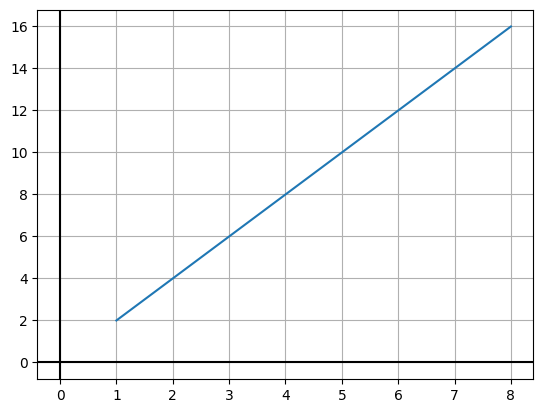

In [185]:
import matplotlib.pyplot as plt

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X.to('cpu'), Y.to('cpu'))
plt.grid()
plt.show()

# First Neural Net

In [201]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = get_device()
device

device(type='mps')

In [203]:
# Setup hyperparameters
batch_size=32

Load Datasets and Data Loaders from ready made datasets

In [204]:
train_dataset = torchvision.datasets.MNIST(
  root='./data',
  train=True,
  transform=transforms.ToTensor(),
  download=True
)

test_dataset = torchvision.datasets.MNIST(
  root='./data',
  train=False,
  transform=transforms.ToTensor(),
)
train_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [252]:
train_loader = torch.utils.data.DataLoader(
  dataset=train_dataset,
  batch_size=batch_size,
  shuffle=True
)
test_loader = torch.utils.data.DataLoader(
  dataset=test_dataset,
  batch_size=batch_size,
  shuffle=False
)

train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x116d6e840>,
 <torch.utils.data.dataloader.DataLoader at 0x117154380>)

In [211]:
examples = iter(train_loader)
example_data, example_targets = next(examples)
example_data.shape, example_targets.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [212]:
example_targets

tensor([5, 1, 1, 9, 2, 3, 4, 7, 5, 0, 9, 6, 6, 3, 3, 8, 4, 2, 5, 2, 2, 8, 8, 2,
        8, 1, 6, 7, 4, 3, 3, 8])

In [214]:
example_data[0].shape

torch.Size([1, 28, 28])

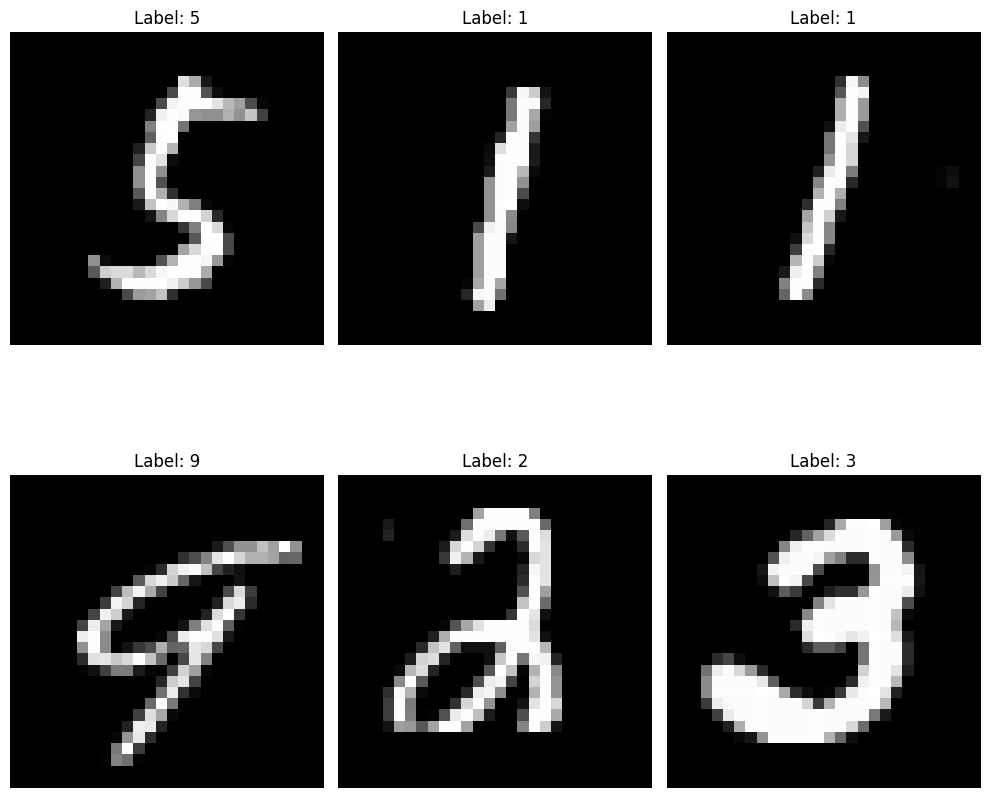

In [220]:
import matplotlib.pyplot as plt

# Assuming batch_size=32, display first 9 images in a 3x3 grid
num_images = 6
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))

for i in range(num_images):
    row = i // 3
    col = i % 3
    # Squeeze to remove channel dim (1, 28, 28) -> (28, 28)
    img = example_data[i].squeeze().cpu().numpy()
    axes[row, col].imshow(img, cmap='gray')
    axes[row, col].set_title(f'Label: {example_targets[i].item()}')
    axes[row, col].axis('off')  # Hide axes for cleaner look

plt.tight_layout()
plt.show()

In [303]:
# Let's create a neural net for classification of images
# we have an image of 28x28 and we need to flatten this and give it to a network
# 28x28 => 784 1D tensor
# Input layer = shape 784 (and we have 32 in each batch) so input shape will be (32,784)
# Second layer is linear then relu then linear (with output shape 10 -> number of classes)

class NeuralNet(nn.Module):
  def __init__(self, input_shape=784, hidden_dim=300, output_shape=10):
    super(NeuralNet, self).__init__()
    self.flatten = nn.Flatten()
    self.linear = nn.Linear(in_features=input_shape, out_features=hidden_dim)
    self.relu = nn.ReLU()
    self.output = nn.Linear(in_features=hidden_dim, out_features=output_shape)

  def forward(self, x):
    x = self.flatten(x)
    z = self.linear(x)
    z = self.relu(z)
    return self.output(z)
  
nn_model = NeuralNet().to('mps')
nn_model

NeuralNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=784, out_features=300, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=300, out_features=10, bias=True)
)

Let's move our data to device and test our model with one example

In [304]:
example_data.to('mps'), example_targets.to('mps')

(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [305]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(nn_model.parameters(), lr=0.01)

In [306]:
import evaluate
accuracy_fn = evaluate.load('accuracy')
accuracy_fn.compute(references=[1,2,3], predictions=[1,2,1])

{'accuracy': 0.6666666666666666}

In [307]:
import evaluate
acc_fn = evaluate.load('accuracy')
def accuracy_fn(y_preds, y_true):
  return acc_fn.compute(references=y_preds, predictions=y_true)['accuracy']

In [308]:
torch.argmax(torch.softmax(torch.tensor([4,2,3], dtype=torch.float32), dim=0))

tensor(0)

In [309]:
len(test_loader)

313

In [310]:
epochs = 25 

for epoch in range(epochs):
  nn_model.train() 
  epoch_loss = 0.0
  num_batches = 0
  
  for step, (X, y) in enumerate(train_loader):
    X, y = X.to(device), y.to(device)
    preds = nn_model(X)
    loss = loss_fn(preds, y)
    
    loss.backward()  # Compute gradients
    optimizer.step()  # Update weights
    optimizer.zero_grad()  # Zero gradients

    epoch_loss += loss.item()  # Accumulate loss
    num_batches += 1
  
  train_avg_loss = epoch_loss / num_batches  # Average loss
  print(f'Epoch: {epoch}, Avg Loss: {train_avg_loss:.4f}')
  test_acc = 0
  test_loss = 0
  with torch.inference_mode():
    model.eval()
    for X, y in test_loader:
      X, y = X.to(device), y.to(device)
      preds = nn_model(X)
      test_loss += loss_fn(preds, y).item()
      pred_classes = torch.argmax(torch.softmax(preds, dim=1), dim=1)
      test_acc += accuracy_fn(pred_classes, y)

    test_avg_acc = test_acc / len(test_loader)
    test_avg_loss = test_loss / len(test_loader)
    print(f'Test loss: {test_avg_loss}, Test accuracy: {test_avg_acc}')

Epoch: 0, Avg Loss: 0.8588
Test loss: 0.40313430082874174, Test accuracy: 0.8950678913738019
Epoch: 1, Avg Loss: 0.3707
Test loss: 0.3207221159610314, Test accuracy: 0.9092452076677316
Epoch: 2, Avg Loss: 0.3167
Test loss: 0.2873072275481285, Test accuracy: 0.9195287539936102
Epoch: 3, Avg Loss: 0.2858
Test loss: 0.2622605818368423, Test accuracy: 0.9259185303514377
Epoch: 4, Avg Loss: 0.2621
Test loss: 0.243568660637822, Test accuracy: 0.9293130990415336
Epoch: 5, Avg Loss: 0.2428
Test loss: 0.2274282820754872, Test accuracy: 0.93560303514377
Epoch: 6, Avg Loss: 0.2259
Test loss: 0.21360779705698402, Test accuracy: 0.9379992012779552
Epoch: 7, Avg Loss: 0.2111
Test loss: 0.19960592369200847, Test accuracy: 0.9427915335463258
Epoch: 8, Avg Loss: 0.1978
Test loss: 0.18925779527231765, Test accuracy: 0.9456869009584664
Epoch: 9, Avg Loss: 0.1863
Test loss: 0.17781065857579437, Test accuracy: 0.9487819488817891
Epoch: 10, Avg Loss: 0.1753
Test loss: 0.16916981382747762, Test accuracy: 0.9